# Granger Causality test

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd

In [95]:
# DataFrame
tesla_tw = pd.read_csv('Tesla_tweet_stock.csv')
tesla_tw.drop('Unnamed: 0', inplace=True, axis=1)
tesla_tw.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up


In [96]:
# DataFrame
tesla_tw_outl = pd.read_csv('Tesla_tweets_stock_outlier.csv')
tesla_tw_outl.drop('Unnamed: 0', inplace=True, axis=1)
tesla_tw_outl.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368


In [97]:
tesla_tw_outl['dum']=pd.get_dummies(tesla_tw_outl['diection'], drop_first=True)

In [98]:
tesla_tw_outl

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar,dum
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924,0
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838,0
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389,1
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091,0
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2022-11-08,194.020,191.300,0.075518,0.308039,0.046128,0.872000,0.081850,0.087291,-2.720,down,-0.180378,-0.355238,0
135,2022-11-09,190.775,177.590,0.060422,0.224464,0.050599,0.878974,0.070418,0.056075,-13.185,down,-1.305575,-0.743621,0
136,2022-11-10,189.900,190.720,0.102952,0.280519,0.043643,0.883635,0.072722,0.108611,0.820,up,0.200243,0.350604,1
137,2022-11-11,186.000,195.970,0.080823,0.277186,0.040436,0.891332,0.068228,0.106121,9.970,up,1.184051,-0.218736,1


In [99]:
tesla_tw_outl.dropna(inplace=True)
tesla_tw_outl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          138 non-null    object 
 1   open          138 non-null    float64
 2   close         138 non-null    float64
 3   polarity      138 non-null    float64
 4   subjectivity  138 non-null    float64
 5   neg           138 non-null    float64
 6   neu           138 non-null    float64
 7   pos           138 non-null    float64
 8   compound      138 non-null    float64
 9   change        138 non-null    float64
 10  diection      138 non-null    object 
 11  std_chang     138 non-null    float64
 12  std_polar     138 non-null    float64
 13  dum           138 non-null    uint8  
dtypes: float64(11), object(2), uint8(1)
memory usage: 15.2+ KB


In [100]:
tesla_tw_outl['dum']= [-1 if change == 0 else change for change in tesla_tw_outl['dum']]
tesla_tw_outl.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar,dum
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924,-1
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838,-1
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389,1
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091,-1
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368,1


In [101]:
# data variable to input into granger
data = tesla_tw_outl[["change", "compound"]].pct_change().dropna()

In [102]:
gc_test = sm.tsa.stattools.grangercausalitytests(data, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4138  , p=0.5212  , df_denom=133, df_num=1
ssr based chi2 test:   chi2=0.4231  , p=0.5154  , df=1
likelihood ratio test: chi2=0.4225  , p=0.5157  , df=1
parameter F test:         F=0.4138  , p=0.5212  , df_denom=133, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2160  , p=0.8060  , df_denom=130, df_num=2
ssr based chi2 test:   chi2=0.4487  , p=0.7991  , df=2
likelihood ratio test: chi2=0.4479  , p=0.7994  , df=2
parameter F test:         F=0.2160  , p=0.8060  , df_denom=130, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1312  , p=0.9414  , df_denom=127, df_num=3
ssr based chi2 test:   chi2=0.4154  , p=0.9371  , df=3
likelihood ratio test: chi2=0.4147  , p=0.9372  , df=3
parameter F test:         F=0.1312  , p=0.9414  , df_denom=127, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7492  , p=0.0312  

**There is Granger causality between stock change (up or down) and compound value of tweets with 4 days lag**

# DataFrame with lag 4

In [206]:
tesla_lag =tesla_tw_outl.copy()
tesla_lag.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar,dum
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924,-1
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838,-1
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389,1
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091,-1
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368,1


In [207]:
tesla_lag['d2'] = tesla_lag['diection'].shift(2)
tesla_lag['d3'] = tesla_lag['diection'].shift(3)
tesla_lag['d4'] = tesla_lag['diection'].shift(4)
tesla_lag['d5'] = tesla_lag['diection'].shift(5)
tesla_lag['d6'] = tesla_lag['diection'].shift(6)


tesla_lag.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar,dum,d2,d3,d4,d5,d6
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924,-1,NaN,NaN,NaN,NaN,NaN
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838,-1,NaN,NaN,NaN,NaN,NaN
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389,1,down,NaN,NaN,NaN,NaN
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091,-1,down,down,NaN,NaN,NaN
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368,1,up,down,down,NaN,NaN


In [208]:
tesla_lag.dropna(inplace=True)
tesla_lag=tesla_lag.reset_index(drop=True)
tesla_lag.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar,dum,d2,d3,d4,d5,d6
0,2022-04-20,343.333,325.733,0.081015,0.251117,0.033261,0.883461,0.083269,0.117910,-17.600,down,-1.780276,-0.213803,-1,up,down,up,down,down
1,2022-04-21,358.243,336.260,0.088765,0.267609,0.035571,0.873623,0.090774,0.129189,-21.983,down,-2.251536,-0.014406,-1,up,up,down,up,down
2,2022-04-22,338.303,335.017,0.080204,0.285056,0.040824,0.870893,0.088193,0.102827,-3.286,down,-0.241235,-0.234659,-1,down,up,up,down,up
3,2022-04-25,326.323,332.673,0.095793,0.291044,0.042035,0.864835,0.093122,0.168048,6.350,up,0.794828,0.166421,1,down,down,up,up,down
4,2022-04-26,331.810,292.140,0.069802,0.267108,0.034006,0.892387,0.073620,0.115805,-39.670,down,-4.153243,-0.502303,-1,down,down,down,up,up


# Decision tree

### Loading libraries 

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [211]:
X = tesla_lag[['compound']]
y= tesla_lag[['d5']]

In [212]:
X.head()

,compound
0,0.117910
1,0.129189
2,0.102827
3,0.168048
4,0.115805


In [213]:
y.head()

,d5
0,down
1,up
2,down
3,up
4,up


,Error_metric,Train,Test
0,Accuracy,0.771739,0.650000
1,Precision,0.682540,0.653846
2,Recall,0.977273,0.772727


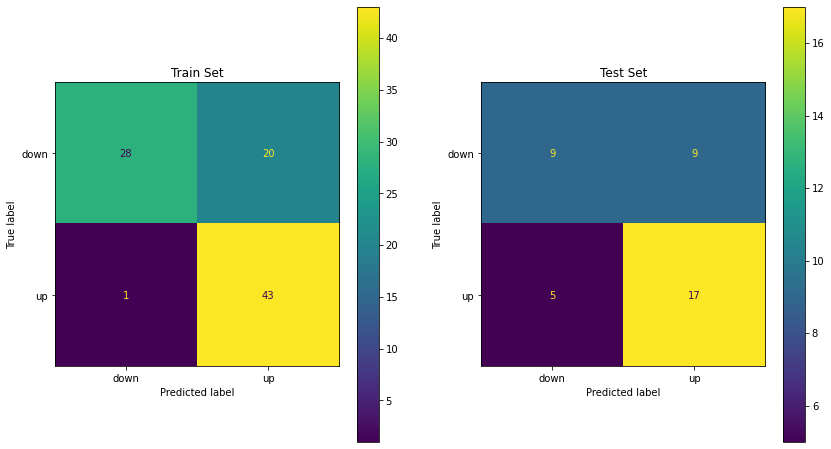

In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='up'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='up')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='up'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='up')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# Random Forest

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:

clf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.5760869565217391
0.675


# Last 7 days

In [228]:
# DataFrame
tesla7 = pd.read_csv('TESLA_Last7days.csv')
tesla7.drop('Unnamed: 0', inplace=True, axis=1)
tesla7.head()

,tweet,date,id,location,id_user,score,Country,Country_real,Compound
0,"The once lambasted electric vehicle hippie, in...",2022-12-07 23:59:57+00:00,1600641295512371201,"Bossier City, LA",118933311,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",Bossier City LA,United States,0.5994
1,RT @spin9: เปิดราคา Tesla อย่างเป็นทางการในไทย...,2022-12-07 23:59:56+00:00,1600641290189697024,NaN,398718149,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,NaN,0.0000
2,@MKBHD were you just at a Tesla dealer in King...,2022-12-07 23:59:56+00:00,1600641287379623936,48th Floor,1576524990,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",48th Floor,NaN,0.0000
3,@RT_com's account has been withheld in Belgium...,2022-12-07 23:59:55+00:00,1600641284518993920,Heaven,2287197110,"{'neg': 0.033, 'neu': 0.873, 'pos': 0.094, 'co...",Heaven,United Kingdom,0.4215
4,RT @LucaBet_123Plus: ✅ กดรีทวิต กดติดตาม หัวใ...,2022-12-07 23:59:50+00:00,1600641265049092097,NaN,1533269401989832706,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,NaN,0.0000


In [229]:
tesla7['date']=pd.to_datetime(tesla7['date'])

In [230]:
tesla7['date']=tesla7['date'].dt.date
tesla7.head()

,tweet,date,id,location,id_user,score,Country,Country_real,Compound
0,"The once lambasted electric vehicle hippie, in...",2022-12-07,1600641295512371201,"Bossier City, LA",118933311,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",Bossier City LA,United States,0.5994
1,RT @spin9: เปิดราคา Tesla อย่างเป็นทางการในไทย...,2022-12-07,1600641290189697024,NaN,398718149,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,NaN,0.0000
2,@MKBHD were you just at a Tesla dealer in King...,2022-12-07,1600641287379623936,48th Floor,1576524990,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",48th Floor,NaN,0.0000
3,@RT_com's account has been withheld in Belgium...,2022-12-07,1600641284518993920,Heaven,2287197110,"{'neg': 0.033, 'neu': 0.873, 'pos': 0.094, 'co...",Heaven,United Kingdom,0.4215
4,RT @LucaBet_123Plus: ✅ กดรีทวิต กดติดตาม หัวใ...,2022-12-07,1600641265049092097,NaN,1533269401989832706,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,NaN,0.0000


In [231]:
tesla7= tesla7.groupby(['date'])['Compound'].mean()
tesla7= tesla7.to_frame()
tesla7= tesla7.reset_index()
tesla7

,date,Compound
0,2022-12-07,0.128022
1,2022-12-08,0.155608
2,2022-12-09,0.029505
3,2022-12-10,0.069755
4,2022-12-11,0.010891
5,2022-12-12,0.005500
6,2022-12-13,0.069047
7,2022-12-14,0.143605


In [239]:
z=tesla7['Compound'].to_numpy()
z = np.reshape(z, (-1, 1))

In [240]:
clf.predict_proba(z)

array([[0.46641732, 0.53358268],
       [0.47669694, 0.52330306],
       [0.6084764 , 0.3915236 ],
       [0.6084764 , 0.3915236 ],
       [0.6084764 , 0.3915236 ],
       [0.6084764 , 0.3915236 ],
       [0.6084764 , 0.3915236 ],
       [0.44920204, 0.55079796]])

In [253]:
pred = clf.predict(z)

In [254]:
tesla7['pred']= pred
tesla7

,date,Compound,pred
0,2022-12-07,0.128022,up
1,2022-12-08,0.155608,up
2,2022-12-09,0.029505,down
3,2022-12-10,0.069755,down
4,2022-12-11,0.010891,down
5,2022-12-12,0.005500,down
6,2022-12-13,0.069047,down
7,2022-12-14,0.143605,up


In [248]:
from datetime import datetime
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data

In [251]:
#DataFrame of Tesla stock price in 2022
start = datetime(2022, 12, 2)
end = datetime(2022, 12, 14)
tesla_stock = get_historical_data("TSLA", start, end, output_format='pandas',token="sk_e0179f146033476aaf5291091322c825")

In [252]:
tesla_stock

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2022-12-02,194.86,196.25,191.11,191.78,2022-12-02,TSLA,73645922,HISTORICAL_PRICES,TSLA,,...,191.11,73645922,191.78,194.86,196.25,191.11,73645922,"Dec 2, 22",0.16,0.0008
2022-12-05,182.45,191.27,180.55,189.44,2022-12-05,TSLA,93122667,HISTORICAL_PRICES,TSLA,,...,180.55,93122667,189.44,182.45,191.27,180.55,93122667,"Dec 5, 22",-12.41,-0.0637
2022-12-06,179.82,183.65,175.33,181.215,2022-12-06,TSLA,92150823,HISTORICAL_PRICES,TSLA,,...,175.33,92150823,181.215,179.82,183.65,175.33,92150823,"Dec 6, 22",-2.63,-0.0144
2022-12-07,174.04,179.38,172.218,175.03,2022-12-07,TSLA,84213284,HISTORICAL_PRICES,TSLA,,...,172.218,84213284,175.03,174.04,179.38,172.218,84213284,"Dec 7, 22",-5.78,-0.0321
2022-12-08,173.44,175.2,169.06,172.2,2022-12-08,TSLA,97624491,HISTORICAL_PRICES,TSLA,,...,169.06,97624491,172.2,173.44,175.2,169.06,97624491,"Dec 8, 22",-0.6,-0.0034
2022-12-09,179.05,182.5,173.36,173.84,2022-12-09,TSLA,104872336,HISTORICAL_PRICES,TSLA,,...,173.36,104872336,173.84,179.05,182.5,173.36,104872336,"Dec 9, 22",5.61,0.0323
2022-12-12,167.82,177.37,167.52,176.1,2022-12-12,TSLA,109794471,HISTORICAL_PRICES,TSLA,,...,167.52,109794471,176.1,167.82,177.37,167.52,109794471,"Dec 12, 22",-11.23,-0.0627
2022-12-13,160.95,175.05,156.91,174.87,2022-12-13,TSLA,175862722,HISTORICAL_PRICES,TSLA,,...,156.91,175862722,174.87,160.95,175.05,156.91,175862722,"Dec 13, 22",-6.87,-0.0409
2022-12-14,156.8,161.62,155.31,159.25,2022-12-14,TSLA,140682338,HISTORICAL_PRICES,TSLA,,...,155.31,140682338,159.25,156.8,161.62,155.31,140682338,"Dec 14, 22",-4.15,-0.0258
